In [1]:
from IPython.core.display import HTML
HTML("<style>" + open("style.css").read() + "</style>")

<div class="headline">
Language Technology / Sprachtechnologie
<br><br>
Wintersemester 2021/2022
</div>
<br>
<div class="description">
    Übung zum Thema <i id="topic">"Essay Scoring"</i>
    <br><br>
    Deadline Abgabe: <i #id="submission">Freitag, 17.12.2021 (11:55 Uhr)</i>
</div>

In [1]:
from keras.models import Sequential
from keras import layers
from keras_preprocessing.sequence import pad_sequences
from keras.utils import np_utils
import pandas as pd
from sklearn import datasets, svm, tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
#from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import sys
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import nltk
import re
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

dataset = pd.DataFrame(data = data['data'] , columns = data['feature_names'])

dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Warm-up

<div class="task_description">
    <i class="task">Task 7.1:</i> <br>
</div>

Which of the following statements are true?

1. Character n-grams are more robust against grammatical errors than token n-grams.
2. Length features are always good in essay scoring.
3. Length features are more susceptible to cheating than n-gram features.
4. Essay scoring is potentially unfair to very creative learners.

<strong style="color: blue">Lösung: </strong>

1. Not necessarily, character n-grams are robust against spelling variation. With grammatical errors, the problem is often not that the word does not exist, but that the wrong form is used.
2. False, they are only a good indicator when essays are written under a time constraint.
3. True. You can influence length easily (repeating the same words over and over). For n-gram features you will probably have to cover some correct content.
4. True. If someone writes something we have never seen in the training data, the algorithm will probably not know what to do with it. If someone writes mainstream, chances are high we can score it more accurately.

## Features and Machine Learning

<div class="task_description">
    <i class="task">Task 7.2:</i> <br>
</div>

<div class="task_description">
   <i class="subtask">7.2.1</i> <i class="l1">L1</i> <br>
</div>
Import the following data file. It contains a number of linguistic features for essay scoring determined on the first prompt of the ASAP data record. 
<br> Output the NrofTokens feature.

In [3]:
df = pd.read_csv('data/featureFileAsap1.tsv', sep='\t')

<strong style="color: blue">Lösung: </strong>

In [4]:
f1 = df['NrofTokens'].values
print(f1)
print(len(f1))

[730. 336. 347. ... 590. 350. 449.]
1783


You can plot the individual features across the different total scores.

C:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

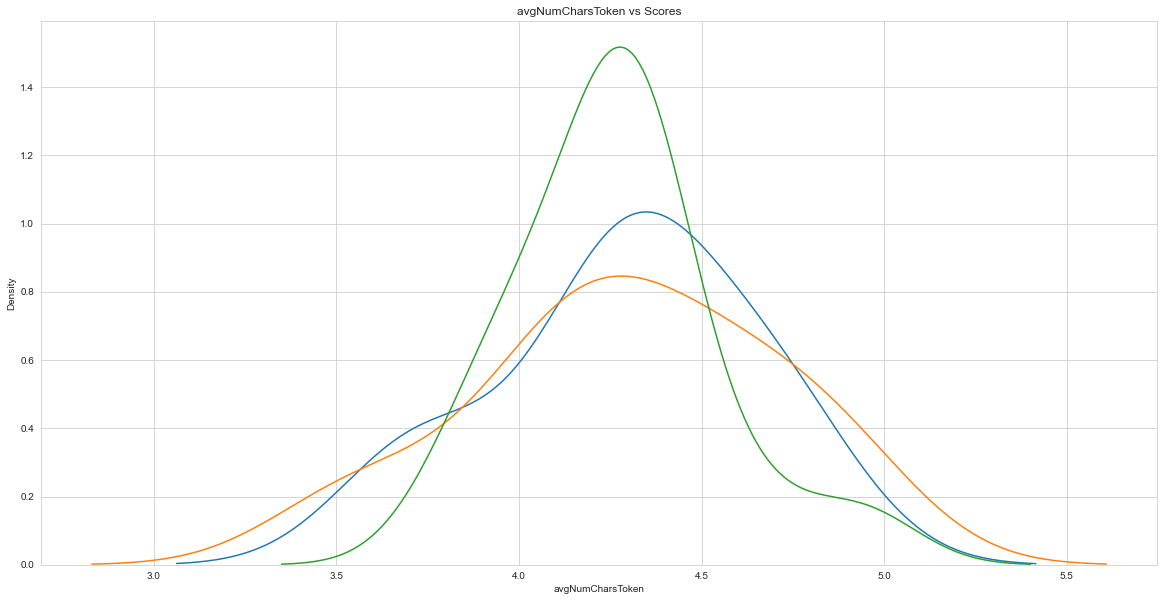

In [5]:
label ='avgNumCharsToken'

plt.figure(figsize=(20, 10))
plt.title(label+' vs Scores')
plt.xlabel(label)
plt.ylabel('Density')

data = df[df.outcome == 2]
sns.kdeplot(data[label], label='Score 2')
data = df[df.outcome == 4]
sns.kdeplot(data[label], label='Score 4')
data = df[df.outcome == 5]
sns.kdeplot(data[label], label='Score 5')
data = df[df.outcome == 6]
sns.kdeplot(data[label], label='Score 6')
data = df[df.outcome == 7]
sns.kdeplot(data[label], label='Score 7')
data = df[df.outcome == 8]
sns.kdeplot(data[label], label='Score 8')
data = df[df.outcome == 9]
sns.kdeplot(data[label], label='Score 9')
data = df[df.outcome == 10]
sns.kdeplot(data[label], label='Score 10')
data = df[df.outcome == 11]
sns.kdeplot(data[label], label='Score 11')
data = df[df.outcome == 12]
sns.kdeplot(data[label], label='Score 12')

plt.legend(prop={'size': 15})

plt.show()

<div class="task_description">
   <i class="subtask">7.2.2</i> <i class="l1">L1</i> <br>
</div>

Compare the plots for the three features, NrofTokens (essay length), avgNumCharsToken (word length) and PronounRatioI (what proportion of pronouns is 'I'). Which feature separates the different essay levels particularly well and which does not?

<strong style="color: blue">Lösung: </strong>

Essay length works particularly well, the pronoun feature does not work well.

<div class="task_description">
   <i class="subtask">7.2.3</i> <i class="l2">L2</i> <br>
</div>

Train a Decision Tree Model on the data with last week's code and evaluate.

<strong style="color: blue">Lösung: </strong>

In [6]:
x = df.iloc[:, 1:len(df.columns)-1]
y = df.iloc[:, [len(df.columns)-1]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

c_tree = DecisionTreeClassifier(max_depth=4)
c_tree.fit(x_train, y_train)

predicted = list(c_tree.predict(x_test))
gold = list(y_test.loc[:, "outcome"])
print(classification_report(gold,predicted))

              precision    recall  f1-score   support

           2       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.68      0.59      0.63        22
           7       0.55      0.30      0.39        20
           8       0.60      0.83      0.70       145
           9       0.32      0.12      0.18        74
          10       0.38      0.54      0.45        61
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00         7

    accuracy                           0.52       357
   macro avg       0.35      0.31      0.32       357
weighted avg       0.46      0.52      0.47       357



C:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [7]:
y_train

,outcome
0.064309,8
0.082237,8
0.085995,10
0.049505,8
0.067568,9
...,...
0.092652,8
0.077731,12
0.083507,9
0.072555,8


<div class="task_description">
    <i class="task">Task 7.3:</i> <br>
</div>
The following code reads the essays from the first prompt of the ASAP dataset and their corresponding scores.

In [8]:
df = pd.read_csv('data/prompt1.tsv', sep='\t')
essays = df['text']
y = df['score1'].values

# Essays are randomly split into 75% training data and 25% test data
essays_train, essays_test, y_train, y_test = train_test_split(essays, y, test_size=0.25, random_state=1000)

We convert the texts into a matrix of token counts based on the words in the training data. <br>
This is a vector that counts for each word in the train data how often it occurs in an essay:

In [9]:
vectorizer = CountVectorizer()
vectorizer.fit(essays_train)
X_train = vectorizer.transform(essays_train)
X_test  = vectorizer.transform(essays_test)

<div class="task_description">
   <i class="subtask">7.3.1</i> <i class="l2">L2</i> <br>
</div>

Print the shape of the train and test data. <br> How many essays do we have? How many features does each essay have?

<strong style="color: blue">Lösung: </strong>

In [10]:
print(X_train.shape)
print(X_test.shape)

(1337, 13349)
(446, 13349)


In [14]:
X_train

<1337x13349 sparse matrix of type '<class 'numpy.int64'>'
	with 221085 stored elements in Compressed Sparse Row format>

In [13]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [14]:
X2 = vectorizer2.fit_transform(essays_train)

In [15]:
vectorizer2.get_feature_names_out()

array(['000 calories', '000 dollar', '00pm if', ..., 'zoo thus',
       'zoom all', 'zoom in'], dtype=object)

In [17]:
print(type(X2))

<class 'scipy.sparse._csr.csr_matrix'>


1337 training essays, 446 test essays, 13349 features

First we use a standard shallow learning classifier on these features

In [28]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
pred = classifier.predict(X_test)
print("Accuracy:", score)

Accuracy: 0.5


C:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We also print a confusion matrix, with the lines being the true labels:

In [29]:
print(confusion_matrix(y_test, pred))

[[  1   0   2   0   0   0]
 [  0   1   7   1   0   0]
 [  0   1  13  27   2   1]
 [  0   1  17 151  51   3]
 [  0   0   2  65  55  15]
 [  0   0   0  11  17   2]]


Now we build our first neural model. <br> We add two layers after the input: the first one with 10 nodes, the second one with 6 nodes, one per possible class. We print the summary of the model.

In [13]:
model = Sequential()
input_dim = X_train.shape[1]
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                133500    
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 133,566
Trainable params: 133,566
Non-trainable params: 0
_________________________________________________________________


We transform the output value to vectors, instead of '3' We would like to have '[0,0,1,0,0,0]'

In [14]:
y_test_orig = y_test
y_train = np.interp(y_train, (1, 6), (0, 5))
y_test = np.interp(y_test, (1, 6), (0, 5))
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Now we do the actual training, we train 10 times on the training data.

In [15]:
model.fit(X_train, y_train,
                     epochs=10,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=10)

Epoch 1/10


C:\Users\Ahmed\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


134/134 [==============================] - 1s 3ms/step - loss: 1.2423 - accuracy: 0.5093 - val_loss: 1.1892 - val_accuracy: 0.5045
Epoch 2/10
134/134 [==============================] - 0s 2ms/step - loss: 0.9876 - accuracy: 0.6485 - val_loss: 1.1806 - val_accuracy: 0.5090
Epoch 3/10
134/134 [==============================] - 0s 3ms/step - loss: 0.7507 - accuracy: 0.7382 - val_loss: 1.1224 - val_accuracy: 0.5022
Epoch 4/10
134/134 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.8654 - val_loss: 1.1891 - val_accuracy: 0.5045
Epoch 5/10
134/134 [==============================] - 0s 2ms/step - loss: 0.3122 - accuracy: 0.9349 - val_loss: 1.2349 - val_accuracy: 0.5067
Epoch 6/10
134/134 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9596 - val_loss: 1.4318 - val_accuracy: 0.4955
Epoch 7/10
134/134 [==============================] - 0s 2ms/step - loss: 0.1343 - accuracy: 0.9716 - val_loss: 1.4672 - val_accuracy: 0.4596
Epoch 8/10
134/13

We evaluate the loss on the training data and on the validation data.

In [16]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

42/42 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9933
Training Accuracy: 0.9933
14/14 [==============================] - 0s 2ms/step - loss: 1.6505 - accuracy: 0.4821
Testing Accuracy:  0.4821


<div class="task_description">
   <i class="subtask">7.3.2</i> <i class="l1">L1</i> <br>
</div>

Observe how the performance develops. Can you explain what is going on here?

<strong style="color: blue">Lösung: </strong>

We overfit on the training data, i.e. our training performance gets better, but we fit so specifically on the training data, that our performance on the test data does not improve anymore.

___
We now get the predictions on the test data and compute a confusion matrix.

In [17]:
pred = model.predict(X_test)
predarray = []
for p in pred:
    predarray.append(p.argmax()+1)
print(confusion_matrix(y_test_orig, predarray))

14/14 [==============================] - 0s 1ms/step
[[  0   0   3   0   0   0]
 [  0   0   5   4   0   0]
 [  0   0   9  33   2   0]
 [  0   0  15 160  46   2]
 [  0   0   2  84  46   5]
 [  0   0   0  15  15   0]]


In the first net, we represented each essays with an feature vector of fixed length, a BOW model. <br>
Now we represent our input as a sequence of tokens, each token is represented by its index.

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(essays_train)

X_train = tokenizer.texts_to_sequences(essays_train)
X_test = tokenizer.texts_to_sequences(essays_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index                                                                                                   

With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.
 <br> <br>
 ___
 We consider only the first 500 words per essay, if there are less words, we pad the remaining words with 0s.




In [19]:
maxlen = 500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

embedding_dim = 50
model2 = Sequential()
model2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(6, activation='softmax'))
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()
history = model2.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

pred = model2.predict(X_test)
predarray = []
for p in pred:
    predarray.append(p.argmax()+1)
print(confusion_matrix(y_test_orig, predarray))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 50)           689750    
                                                                 
 flatten (Flatten)           (None, 25000)             0         
                                                                 
 dense_2 (Dense)             (None, 10)                250010    
                                                                 
 dense_3 (Dense)             (None, 6)                 66        
                                                                 
Total params: 939,826
Trainable params: 939,826
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
134/134 [==============================] - 2s 13ms/step - loss: 0.9819 - accuracy: 0.6253 - val_loss: 0.8684 - val_accuracy: 0.6143
Epoch 2/20
134/134 [=================

In the following variant of the model, we use pretrained word-embeddings. <br>
PS: Download the text file "glove.6B.100d.txt" from Moodle

In [20]:
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
    return embedding_matrix


embedding_dim = 100
embedding_matrix = create_embedding_matrix(
     'glove.6B.100d.txt',
     tokenizer.word_index, embedding_dim)


model3 = Sequential()
model3.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model3.add(layers.Flatten())
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(6, activation='softmax'))
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()
history = model3.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model3.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model3.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))

pred = model3.predict(X_test)
predarray = []
for p in pred:
    predarray.append(p.argmax()+1)
print(confusion_matrix(y_test_orig, predarray))

FileNotFoundError: [Errno 2] No such file or directory: 'glove.6B.100d.txt'

<div class="task_description">
   <i class="subtask">7.3.3</i> <i class="l2">L2</i> <br>
</div>

Try to play with some of the parameters: Should we use longer or shorter essays lengths? A different number of hidden units? An additional hidden layer?

## Overall evaluation

<div class="task_description">
    <i class="task">Task 7.4:</i>  <br>
</div>

The following code computes linearly and quadratically weighted kappa (Set weight to „linear“ or „quadratic“).

In [21]:
cohen_kappa_score(y1, y2, labels=None, weights=None, sample_weight=None) 

NameError: name 'y1' is not defined

Given is the following confusion matrix. Lines are true values. 

In [ ]:
array=[[20, 5, 10],[15, 20, 5],[10, 20, 10]]
df_cm = pd.DataFrame(array, index = [i for i in "012"],
                     columns = [i for i in "012"])
plt.figure(figsize = (4,3))
sns.heatmap(df_cm, annot=True,cmap="Blues")

<div class="task_description">
   <i class="subtask">7.4.1</i> <i class="l1">L1</i> <br>
</div>

Compute the accuracy and the kappa for the confusion matrix above.

<strong style="color: blue">Lösung: </strong>

In [ ]:
gold0 = [0] * 35 + [1] * 40 + [2] * 40
pred0 = [0] * 20 + [1] * 5 + [2] * 10 + [0] * 15 + [1] * 20 + [2] * 5 + [0] * 10 + [1] * 20 + [2] * 10

print(confusion_matrix(gold0, pred0))
print("Accuracy: ", accuracy_score(gold0, pred0, normalize=True, sample_weight=None))
print("Kappa: ", cohen_kappa_score(gold0, pred0, weights='quadratic'))

<div class="task_description">
   <i class="subtask">7.4.2</i> <i class="l1">L1</i> <br>
</div>
Can you find a different confusion matrix, which has the same label distribution in the gold standard, the same accuracy, but a better QWK (Quadratic Weighted Kappa)?

<strong style="color: blue">Lösung: </strong>

In [ ]:
gold1 = [0] * 35 + [1] * 40 + [2] * 40
pred1 = [0] * 20 + [1] * 5 + [2] * 10 + [0] * 15 + [1] * 20 + [2] * 5 + [0] * 0 + [1] * 30 + [2] * 10

print(confusion_matrix(gold1, pred1))
print("Accuracy: ",accuracy_score(gold1, pred1, normalize=True, sample_weight=None))
print("Kappa: ",cohen_kappa_score(gold1, pred1, weights='quadratic'))

A better matrix has less entries in the extreme cases (0-2, 2-0) while having the same number of gold standard instances per class.

<div class="task_description">
   <i class="subtask">7.4.3</i> <i class="l1">L1</i> <br>
</div>

Can you find one with a worse QWK? 

<strong style="color: blue">Lösung: </strong>

In [ ]:
gold2 = [0] * 35 + [1] * 40 + [2] * 40
pred2 = [0] * 20 + [1] * 0 + [2] * 15 + [0] * 15 + [1] * 20 + [2] * 5 + [0] * 10 + [1] * 20 + [2] * 10

print(confusion_matrix(gold2, pred2))
print("Accuracy: ",accuracy_score(gold2, pred2, normalize=True, sample_weight=None))
print("Kappa: ",cohen_kappa_score(gold2, pred2, weights='quadratic'))

# Homework

<div class="task_description">
    <i class="task">7.1.</i> :::10 Homework points:::
</div>


The following code makes a one-hot feature vector out of an essay and classifies it. 

In [ ]:
my_essay = 'this is an example essay.'
X_testing = tokenizer.texts_to_sequences([my_essay])
X_testing = pad_sequences(X_testing, padding='post', maxlen=maxlen)
print(model2.predict(X_testing).argmax()+1)

<div class="task_description">
   <i class="subtask">7.1.1.</i> <br>
</div>

Try to write a text that gets very high scores and a text that receives very low scores.

<div class="task_description">
   <i class="subtask">7.1.2.</i> <br>
</div>

Can you write something that does not make sense to a human but still receives high scores?

<div class="task_description">
   <i class="subtask">7.1.3.</i> <br>
</div>

Can you write something that should be correct and receives low scores?

____
For each task, describe how you proceeded. <br><br><br>
__Remember we are in prompt 1:__ <br>
<br>*More and more people use computers, but not everyone agrees that this benefits society. Those who support advances in technology believe that computers have a positive effect on people. They teach hand-eye coordination, give people the ability to learn about faraway places and people, and even allow people to talk online with other people. Others have different ideas. Some experts are concerned that people are spending too much time on their computers and less time exercising, enjoying nature, and interacting with family and friends.*
<br><br>
*Write a letter to your local newspaper in which you state your opinion on the effects computers have on people. Persuade the readers to agree with you.*
<br><br>
You may have a look at the full scoring guidelines for this prompt.